# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# National Park Visits in the American Southwest

**Data Source**  
Tidy Tuesday - https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-09-17  
fivethirtyeight article - https://fivethirtyeight.com/features/the-national-parks-have-never-been-more-popular/  
national park data - https://data.world/inform8n/us-national-parks-visitation-1904-2016-with-boundaries  
population data - https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_historical_population  
gas price data - https://www.energy.gov/eere/vehicles/fact-915-march-7-2016-average-historical-annual-gasoline-pump-price-1929-2015  

**Question**  
How do gas prices affect visitation per capita of continental US?

In [1]:
# load libraries

%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
park_visits = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-09-17/national_parks.csv",
                         dtype = {'year': 'str'})
state_pop = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-09-17/state_pop.csv",
                       dtype = {'year': 'str'})
gas_price = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-09-17/gas_price.csv",
                       dtype = {'year': 'str'})

In [3]:
park_visits.head()

,year,gnis_id,geometry,metadata,number_of_records,parkname,region,state,unit_code,unit_name,unit_type,visitors
0,1904,1163670,POLYGON,NaN,1,Crater Lake,PW,OR,CRLA,Crater Lake National Park,National Park,1500.0
1,1941,1531834,MULTIPOLYGON,NaN,1,Lake Roosevelt,PW,WA,LARO,Lake Roosevelt National Recreation Area,National Recreation Area,0.0
2,1961,2055170,MULTIPOLYGON,NaN,1,Lewis and Clark,PW,WA,LEWI,Lewis and Clark National Historical Park,National Historical Park,69000.0
3,1935,1530459,MULTIPOLYGON,NaN,1,Olympic,PW,WA,OLYM,Olympic National Park,National Park,2200.0
4,1982,277263,POLYGON,NaN,1,Santa Monica Mountains,PW,CA,SAMO,Santa Monica Mountains National Recreation Area,National Recreation Area,468144.0


In [4]:
state_pop.head()

,year,state,pop
0,1900,AL,1830000.0
1,1901,AL,1907000.0
2,1902,AL,1935000.0
3,1903,AL,1957000.0
4,1904,AL,1978000.0


In [5]:
gas_price.head()

,year,gas_current,gas_constant
0,1929,0.21,2.38
1,1930,0.20,2.30
2,1931,0.17,2.18
3,1932,0.18,2.61
4,1933,0.18,2.66


In [6]:
#merge state_pop and gas_price data
state_gas = state_pop.merge(gas_price, how = 'inner', on = 'year') #1929 onwards
sg = state_gas.set_index(['year', 'state'])
sg.head()

pop  gas_current  gas_constant
year state                                      
1929 AL     2644000.0         0.21          2.38
     AK           NaN         0.21          2.38
     AZ      430000.0         0.21          2.38
     AR     1852000.0         0.21          2.38
     CA     5531000.0         0.21          2.38

In [9]:
#tidy park_visits
parks = park_visits.sort_values(by = ['year'])
columns_to_keep = ['parkname', 'region', 'unit_type', 'visitors']
p1 = parks[(parks['state'] != 'HI') & (parks['state'] != 'AK')].set_index(['year', 'state'])
p1 = p1[columns_to_keep]
p1.head()

parkname region      unit_type  visitors
year state                                               
1904 OR       Crater Lake     PW  National Park    1500.0
     AR       Hot Springs     MW  National Park  101000.0
     SD         Wind Cave     MW  National Park    2900.0
     WA     Mount Rainier     PW  National Park     563.0
     CA      Kings Canyon     PW  National Park    1000.0

In [12]:
# merge sg and p1
sg1 = sg.reset_index()
df = p1.merge(sg1, how = 'inner', left_index = True, right_on = ['year', 'state'])
cols = ['parkname', 'state', 'visitors', 'pop', 'gas_constant']
df = df.reset_index()
df = df.set_index('year')
df = df[df['unit_type'] == 'National Park']
df = df[cols]
df['visits_per_capita'] = df['visitors'] / df['pop']
df.head()

,parkname,state,visitors,pop,gas_constant,visits_per_capita
year,,,,,,
1929,Carlsbad Caverns,NM,76822.0,420000.0,2.38,0.182910
1929,Arches,UT,500.0,508000.0,2.38,0.000984
1929,Bryce Canyon,UT,21997.0,508000.0,2.38,0.043301
1929,Zion,UT,33383.0,508000.0,2.38,0.065715
1929,Grand Canyon,AZ,184093.0,430000.0,2.38,0.428123


<IPython.core.display.Javascript object>


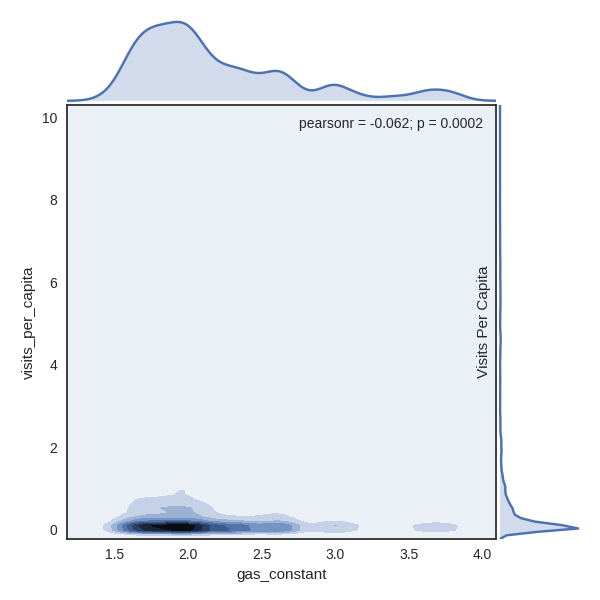

In [15]:
sns.set_style('white')

# relationship between gas price and utah national park visits. not the right graph for the job.
sns.jointplot(df['gas_constant'], df['visits_per_capita'], kind = 'kde', space = 0);

<IPython.core.display.Javascript object>


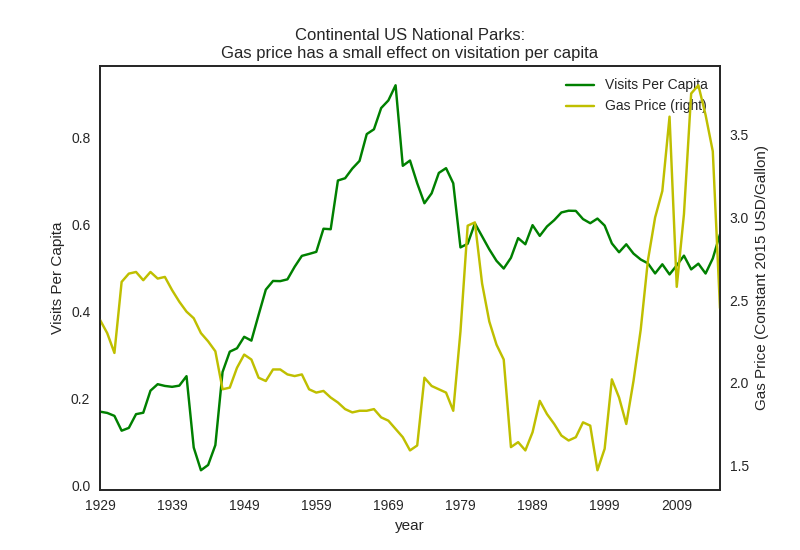

In [57]:
cols1 = ['gas_constant', 'visits_per_capita']
df1 = df[cols1].rename(columns = {'gas_constant': 'Gas Price', 'visits_per_capita': 'Visits Per Capita'})
df2 = df1.reset_index().groupby('year').mean()
ax = df2.plot(x = df2.index, y = 'Visits Per Capita', c = 'g')
plt.ylabel('Visits Per Capita')
df2.plot(x = df2.index, y = 'Gas Price', secondary_y = True, c = 'y', ax = ax,
        title = 'Continental US National Parks:\nGas price has a small effect on visitation per capita')
plt.ylabel('Gas Price (Constant 2015 USD/Gallon)');
